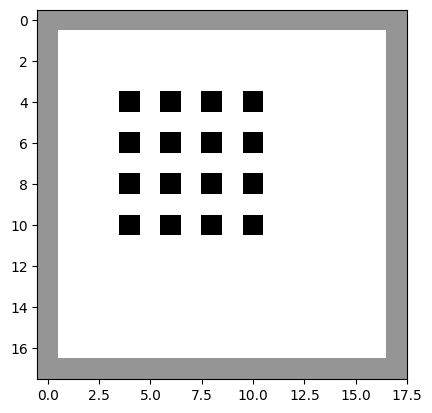

In [1]:
import cellpylib as cpl
import numpy as np

"""
2D Block CA from 
https://writings.stephenwolfram.com/2023/02/computational-foundations-for-the-second-law-of-thermodynamics/
"""

initial_conditions = np.array([[
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]])


def make_block2d_rule():
    base_rules = {
        ((0, 0), (0, 0)): ((0, 0), (0, 0)),
        ((0, 0), (0, 2)): ((2, 0), (0, 0)),
        ((2, 0), (0, 0)): ((0, 0), (0, 2)),
        ((0, 0), (2, 0)): ((0, 2), (0, 0)),
        ((0, 2), (0, 0)): ((0, 0), (2, 0)),
        ((0, 0), (2, 2)): ((2, 2), (0, 0)),
        ((2, 2), (0, 0)): ((0, 0), (2, 2)),
        ((0, 2), (0, 2)): ((2, 0), (2, 0)),
        ((2, 0), (2, 0)): ((0, 2), (0, 2)),
        ((0, 2), (2, 0)): ((2, 0), (0, 2)),
        ((2, 0), (0, 2)): ((0, 2), (2, 0)),
        ((0, 2), (2, 2)): ((2, 2), (2, 0)),
        ((2, 2), (2, 0)): ((0, 2), (2, 2)),
        ((2, 0), (2, 2)): ((2, 2), (0, 2)),
        ((2, 2), (0, 2)): ((2, 0), (2, 2)),
        ((2, 2), (2, 2)): ((2, 2), (2, 2)),
        # wall rules
        ((0, 0), (1, 1)): ((0, 0), (1, 1)),
        ((0, 1), (1, 1)): ((0, 1), (1, 1)),
        ((0, 2), (1, 1)): ((2, 0), (1, 1)),
        ((2, 0), (1, 1)): ((0, 2), (1, 1)),
        ((2, 1), (1, 1)): ((2, 1), (1, 1)),
        ((2, 2), (1, 1)): ((2, 2), (1, 1)),
        ((1, 1), (1, 1)): ((1, 1), (1, 1)),
    }
    rules = {}
    # add rotations
    for r, v in base_rules.items():
        rules[r] = v
        for _ in range(3):
            r = ((r[1][0], r[0][0]), (r[1][1], r[0][1]))
            v = ((v[1][0], v[0][0]), (v[1][1], v[0][1]))
            if r not in rules:
                rules[r] = v
    def _apply_rule(n, t):
        n = tuple(tuple(i) for i in n)
        return rules[n]
    return _apply_rule


ca = cpl.evolve2d_block(initial_conditions, block_size=(2, 2),
                        timesteps=40, apply_rule=make_block2d_rule())

cpl.plot2d_animate(ca)


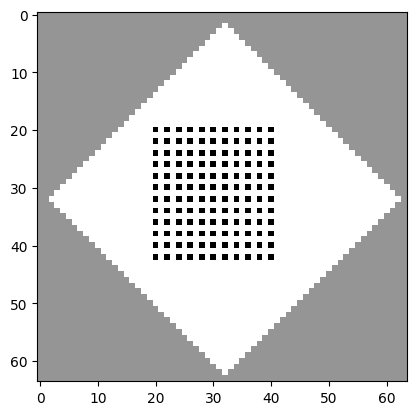

In [3]:
import cellpylib as cpl
import numpy as np

"""
2D Block CA from 
https://writings.stephenwolfram.com/2023/02/computational-foundations-for-the-second-law-of-thermodynamics/
"""

initial_conditions = np.loadtxt('block2d_rotated_initial_conditions.txt', dtype=int)
initial_conditions = np.array([initial_conditions])


def make_block2d_rule():
    base_rules = {
        ((0, 0), (0, 0)): ((0, 0), (0, 0)),
        ((0, 0), (0, 2)): ((2, 0), (0, 0)),
        ((2, 0), (0, 0)): ((0, 0), (0, 2)),
        ((0, 0), (2, 0)): ((0, 2), (0, 0)),
        ((0, 2), (0, 0)): ((0, 0), (2, 0)),
        ((0, 0), (2, 2)): ((2, 2), (0, 0)),
        ((2, 2), (0, 0)): ((0, 0), (2, 2)),
        ((0, 2), (0, 2)): ((2, 0), (2, 0)),
        ((2, 0), (2, 0)): ((0, 2), (0, 2)),
        ((0, 2), (2, 0)): ((2, 0), (0, 2)),
        ((2, 0), (0, 2)): ((0, 2), (2, 0)),
        ((0, 2), (2, 2)): ((2, 2), (2, 0)),
        ((2, 2), (2, 0)): ((0, 2), (2, 2)),
        ((2, 0), (2, 2)): ((2, 2), (0, 2)),
        ((2, 2), (0, 2)): ((2, 0), (2, 2)),
        ((2, 2), (2, 2)): ((2, 2), (2, 2)),
        # wall rules
        ((0, 0), (1, 1)): ((0, 0), (1, 1)),
        ((0, 1), (1, 1)): ((0, 1), (1, 1)),
        ((0, 2), (1, 1)): ((2, 0), (1, 1)),
        ((2, 0), (1, 1)): ((0, 2), (1, 1)),
        ((2, 1), (1, 1)): ((2, 1), (1, 1)),
        ((2, 2), (1, 1)): ((2, 2), (1, 1)),
        ((1, 1), (1, 1)): ((1, 1), (1, 1)),
        ((1, 0), (0, 0)): ((1, 0), (0, 0)),
        ((1, 0), (0, 2)): ((1, 0), (0, 2)),
    }
    rules = {}
    # add rotations
    for r, v in base_rules.items():
        rules[r] = v
        for _ in range(3):
            r = ((r[1][0], r[0][0]), (r[1][1], r[0][1]))
            v = ((v[1][0], v[0][0]), (v[1][1], v[0][1]))
            if r not in rules:
                rules[r] = v
    def _apply_rule(n, t):
        n = tuple(tuple(i) for i in n)
        return rules[n]
    return _apply_rule


ca = cpl.evolve2d_block(initial_conditions, block_size=(2, 2),
                        timesteps=251, apply_rule=make_block2d_rule())

cpl.plot2d_animate(ca)
